In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ptitprince as pt

data = pd.read_csv("C:/Users/naomi/Downloads/Invisibility_Cloak.csv")
data

,Participant,Cloak,Mischief
0,1,0,3
1,2,0,1
2,3,0,5
3,4,0,4
4,5,0,6
5,6,0,4
6,7,0,6
7,8,0,2
8,9,0,0
9,10,0,5


We can see that the assumptions:
1. The dependent variable (Mischief) is continuous
2. The independent variable (cloak) is categorical, and consists of two independent groups
3. Each participant is present to only one group

Thus, the first three assumptions to conduct an independent t-test is met. 

### Creating a rain cloud plot to see outliers:

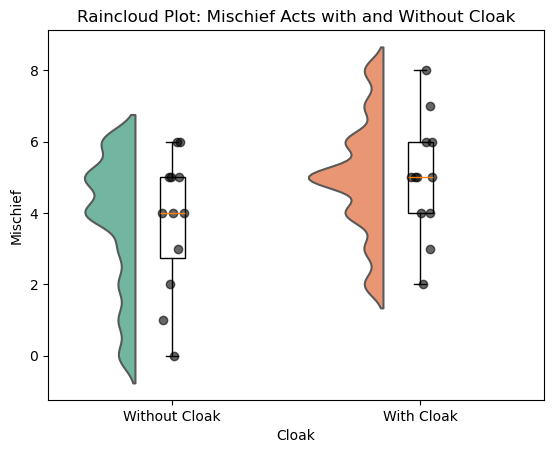

In [6]:
fig, ax = plt.subplots()
pt.half_violinplot(x='Cloak', y='Mischief', data=data, inner=None, ax=ax, width=0.6, palette='Set2', bw=0.2)
cloaks = [0,1]

for i, cloak in enumerate(cloaks):
    data_cloak = data[data['Cloak'] == cloak]

    x = np.full(len(data_cloak), i) + np.random.uniform(-0.05, 0.05, size=len(data_cloak))
    y = data_cloak['Mischief']

    ax.scatter(x, y, alpha=0.6, color='k')

boxplot_data = [
    data[data["Cloak"] == 0]["Mischief"].to_numpy(),
    data[data["Cloak"] == 1]["Mischief"].to_numpy()
]

POSITIONS = [0, 1]

ax.boxplot(boxplot_data, vert=True, positions=POSITIONS, widths=0.1, patch_artist=True, boxprops=dict(facecolor='none'))

ax.set_xticks([0, 1])
ax.set_xticklabels(['Without Cloak', 'With Cloak'])
ax.set_title('Raincloud Plot: Mischief Acts with and Without Cloak')
ax.set_ylabel('Mischief')
plt.show()

From the data, there are no visible outliers and the data is visually distributed. However, we will use the Shapiro Wilk Test for each cloak type to make sure that there are no outliers

We will use an alpha of 0.05 for the test.

### Shapiro-Wilk Test

In [8]:
cloak_grp = data[data['Cloak'] == 1]['Mischief']
no_cloak_grp = data[data['Cloak'] == 0]['Mischief']

shapiro_cloak = stats.shapiro(cloak_grp)
shapiro_no_cloak = stats.shapiro(no_cloak_grp)

print(f'Shapiro-Wilk Test for Cloak Group 1:\n{shapiro_cloak}\n')
print(f'Shapiro-Wilk Test for Cloak Group 2:\n{shapiro_no_cloak}')

Shapiro-Wilk Test for Cloak Group 1:
ShapiroResult(statistic=0.9726165533065796, pvalue=0.9361882209777832)

Shapiro-Wilk Test for Cloak Group 2:
ShapiroResult(statistic=0.9127635359764099, pvalue=0.23144638538360596)


From both tests, we can see that both cloak types are normally distributed, with both p values are greater than alpha.

Using Levene's Test for Equality of Variance to check the homogenity of variances:

### Levene's Test 

In [17]:
levene_test = stats.levene(cloak_grp, no_cloak_grp)
levene_test

LeveneResult(statistic=0.2697547683923706, pvalue=0.6086825890641905)

Since the p-value of the Levene's test is greater than 0.05, we can say that the variance is homogenous across both value sets.

Since all assumptions are met, we can proceed to the Independent T-test.

### Independent T-test

In [18]:
t_test = stats.ttest_ind(cloak_grp, no_cloak_grp)
t_test

TtestResult(statistic=1.713459383965147, pvalue=0.10068634487481125, df=22.0)

In [ ]:
With a p-value greater than 0.05, we can say that the independent samples t-test